# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [ ]:
!pip install smolagents

Let's also login to the Hugging Face Hub to have access to the Inference API.

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [2]:
from smolagents import CodeAgent, InferenceClientModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=InferenceClientModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen3-Next-80B-A3B-Thinking ───────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  result = catering_service_tool(query="Gotham City")                                                              
  final_answer(result)                                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Gotham Catering Co.

[Step 1: Duration 24.78 seconds| Input tokens: 2,081 | Output tokens: 2,939]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [3]:
from smolagents import Tool, CodeAgent, InferenceClientModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=InferenceClientModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen3-Next-80B-A3B-Thinking ───────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  theme = superhero_party_theme_generator(category="villain masquerade")                                           
  final_answer(theme)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 1: Duration 2.66 seconds| Input tokens: 2,116 | Output tokens: 347]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [ ]:
party_theme_tool.push_to_hub("{your_username}/catering_service_tool", token="<YOUR_HUGGINGFACEHUB_API_TOKEN>")

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen3-Next-80B-A3B-Thinking ───────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor's grand ballroom, featuring made-up superheroes:     
  Luminous (wearing a suit that emits bright, colorful energy patterns), Ironclad (golden armor with black         
  accents), Shadowstrike (dark cloak with glowing violet eyes), Aquaflux (blue and silver aquatic-themed costume   
  with water droplets floating around), and Chrono (a suit with clock gears and time-themed symbols). The room is  
  decorated with crystal chandeliers, velvet drapes, golden accents, holographic displays of superhero logos, and  
  a gourmet buffet with champagne towers. High-resolution, photorealistic, cinematic lighting, detailed, elegant   
  atmosphere."                                                                                                     
  image = image_generator(prompt=prompt)                                                                           
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Final answer: <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=512x512 at 0x78E1149C84A0>

[Step 1: Duration 9.58 seconds| Input tokens: 2,111 | Output tokens: 1,299]

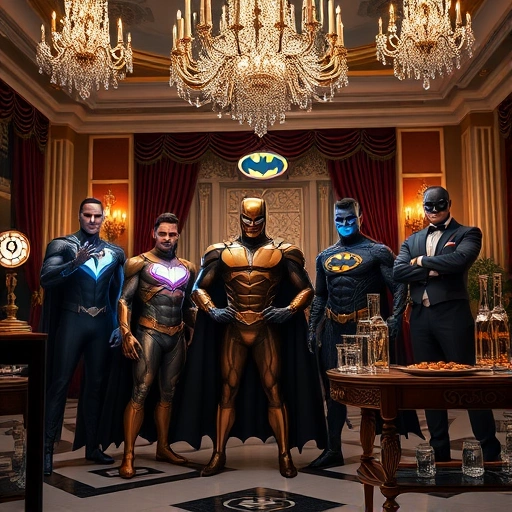

In [4]:
from smolagents import load_tool, CodeAgent, InferenceClientModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=InferenceClientModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [5]:
!pip install gradio_client

In [ ]:
from smolagents import CodeAgent, InferenceClientModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

In [7]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/d5a8dfbade97e9b9d99f78d5ccaa73db6d4b8dc428662f2f25bde1de1bd77b81/image.webp'

img = PILImage.open(image_path)
img

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/gradio/d5a8dfbade97e9b9d99f78d5ccaa73db6d4b8dc428662f2f25bde1de1bd77b81/image.webp'

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [ ]:
!pip install langchain-community google-search-results

In [ ]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [ ]:
from langchain.agents import load_tools
from smolagents import CodeAgent, InferenceClientModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search(task="virtual event ideas for superhero-themed events, including live performances and interactive        
  experiences")                                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: ['From theme days to care packages to costume contests, here is a list of fun ways to celebrate spirit weeks 
in remote offices.', 'Our virtual superhero happy hour event includes fun activities and a virtual field trip to 
iconic superhero filming sites. Your team will learn ...', 'Create your own music festival experience by watching 
videos and recorded shows together, or make plans to attend a live online show together.', "We'll explore unique 
and engaging event ideas for both in-person and virtual gatherings to ensure that your event leaves a lasting 
impression on your guests.", 'Teams get to design their own superhero characters and comics, then assemble Green 
Machine bikes and teddy bears for deserving kids.', 'Meet your favorite Superhero right from your own home! 15 
minutes includes personalized chat time, brief "Superhero Training," and singing "Happy Birthday" (if ...', 
'Superhero Theme. Everyone can dress up as their favorite superheroes or create their own superheroes for a fun and
imaginative virtual costume ...', 'These 10 best virtual networking event ideas will take your virtual gatherings 
from bland to brilliant.', 'The best unusual team building activities for virtual meetings are games that build 
critical team skills like communication, collaboration, and creativity.', 'Find virtual office party ideas your 
team will love! Perfect for virtual meetings, awards ceremonies, holiday parties, and more.']

[Step 0: Duration 11.74 seconds| Input tokens: 2,082 | Output tokens: 61]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  search(task="superhero-themed live performances and interactive experiences for events")                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out: ["Allow your guests to live out their childhood fantasy of being a superhero from a comic book with O'Brien 
Productions Superheroes Party.", 'When in doubt, throw a superhero party - this party theme will save the day! Be 
the hero of your own story, and create the ultimate superhero themed event.', 'Engage in action-packed activities, 
thrilling photo ops, and dynamic performances that bring superhero stories to life. Versatile Appearances. Perfect 
for ...', 'OVERVIEW. Join Spider-Man, Hulk, Captain America, Iron Man and the Avengers against the forces of evil. 
Climb vertical treadmills with Spiderman.', 'We offer several superhero party characters & affordable party 
packages.Black Panther,Superman,Wonder Woman,Iron Man party.', 'Superhero Encounter brings your favourite comic 
book characters to life with action-packed performances and interactive experiences. Perfect for parties, ...', 'We
designed & produced multiple themed interactive activations & media zones for this Superhero themed event for a 
biotech company. Our Experiential ...', 'Unleash the hero within! Strike a legendary pose during scheduled photo 
moments with such Super Heroes as: Spider-Man; Thor; Loki; Black Panther; Shuri from ...', 'What is included in a 
superhero party? · Fun games and prizes · Epic superhero story time · An extra special surprise for the VIP 
birthday boy/girl.', 'Live out your fictional fantasies at your very own Superhero themed event! Our props, 
performers, and decor will save the day!']

[Step 1: Duration 7.26 seconds| Input tokens: 4,574 | Output tokens: 119]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = [                                                                                   
      {                                                                                                            
          "name": "O'Brien Productions Superheroes Party",                                                         
          "description": "Engages guests with dynamic performances and action-packed activities that bring         
  superhero stories to life."                                                                                      
      },                                                                                                           
      {                                                                                                            
          "name": "Superhero Encounter",                                                                           
          "description": "Brings favorite comic book characters to life with action-packed performances and        
  interactive experiences, perfect for parties."                                                                   
      },                                                                                                           
      {                                                                                                            
          "name": "Biotech Company Event",                                                                         
          "description": "Included themed interactive activations and media zones providing a unique               
  superhero-themed experience."                                                                                    
      }                                                                                                            
  ]                                                                                                                
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: [{'name': "O'Brien Productions Superheroes Party", 'description': 'Engages guests with dynamic 
performances and action-packed activities that bring superhero stories to life.'}, {'name': 'Superhero Encounter', 
'description': 'Brings favorite comic book characters to life with action-packed performances and interactive 
experiences, perfect for parties.'}, {'name': 'Biotech Company Event', 'description': 'Included themed interactive 
activations and media zones providing a unique superhero-themed experience.'}]

[Step 2: Duration 13.02 seconds| Input tokens: 7,506 | Output tokens: 356]

[{'name': "O'Brien Productions Superheroes Party",
  'description': 'Engages guests with dynamic performances and action-packed activities that bring superhero stories to life.'},
 {'name': 'Superhero Encounter',
  'description': 'Brings favorite comic book characters to life with action-packed performances and interactive experiences, perfect for parties.'},
 {'name': 'Biotech Company Event',
  'description': 'Included themed interactive activations and media zones providing a unique superhero-themed experience.'}]

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉